<a href="https://colab.research.google.com/github/Phatdeluxe/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
# function to find the mean of a list of length n
def mean(list):
  total = 0
  for i in range(0, len(list)):
    total += list[i]
  return total/len(list)

In [0]:
# function to find the variance of a list of length n
def variance(list):
  xBar = mean(list)
  total = 0
  for i in range(0, len(list)):
    total += (list[i] - xBar)**2
  return total/(len(list) - 1)

In [0]:
# function to find the standard deviation of a list of length n
def stdDev(list):
  return (variance(list))**.5

### Using my functions to find the Mean, Variance, and Standard Deviation

In [88]:
meanList = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
print(mean(meanList))

3052.714285714286


In [89]:
variance(meanList)

214387.90476190473

In [85]:
stdDev(meanList)

428.67360686714756

### Using Numpy to confirm the correctness of my functions

In [0]:
import numpy as np

In [80]:
np.mean(meanList)

3052.714285714286

In [92]:
np.var(meanList, ddof=1)

214387.90476190473

In [25]:
np.std(meanList)

428.67360686714756

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
import pandas as pd

In [0]:
customerCount = [127, 80, 105, 92, 120, 115, 93]

In [0]:
# Function to find the covariance of 2 lists of the same length
def covarr(list1, list2):
  mean1 = mean(list1)
  mean2 = mean(list2)
  total = 0
  if len(list1) == len(list2):
    for i in range(0, len(list1)):
      total += ((list1[i] - mean1) * (list2[i] - mean2))
    return total / (len(list1) - 1)
  else:
    return print('Lists are not the same length')

In [95]:
df = pd.DataFrame([meanList, customerCount]).T
df.head()

,0,1
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120


In [96]:
covarr(df[0], df[0])

214387.90476190473

In [97]:
covarr(df[0], df[1])

7604.357142857142

In [98]:
covarr(df[1], df[1])

290.95238095238096

In [99]:
dfCov = df.cov()
dfCov

,0,1
0,214387.904762,7604.357143
1,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
# Function to take two list of the same length and calculate the correlation coefficient
def correl(list1, list2):
  if len(list1) == len(list2):
    covar = covarr(list1, list2)
    return covar / (stdDev(list1) * stdDev(list2))
  else:
    return print('List are not the same length')

In [107]:
correl(customerCount, meanList)

0.9628339778148909

In [108]:
correl(meanList, meanList)

1.0

In [109]:
df.corr()

,0,1
0,1.000000,0.962834
1,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [111]:
titDf = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titDf.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [112]:
titDf.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [113]:
titDf.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
# a synonym of orthogonal is perpendicular
import matplotlib.pyplot as plt

(-0.5, 1.5)

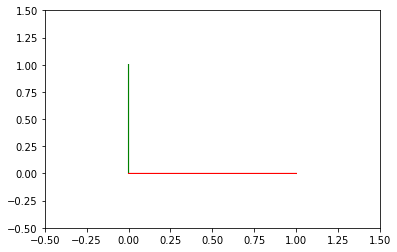

In [119]:
plt.arrow(0, 0, 0, 1, color='g')
plt.arrow(0, 0, 1, 0, color='r')
plt.xlim(-.5, 1.5)
plt.ylim(-.5, 1.5)

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [123]:
# They are not orthogonal because their dot product does not equal zero
a = np.array([-5, -3, -7])
b = np.array([6, -8, 2])
np.dot(b, a)

-20

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [161]:
c = np.array([2, -15, 6, 20])
cT = np.array([[2], [-15], [6], [20]])
print(c.shape)
print(cT.shape)

(4,)
(4, 1)


In [162]:
print(c)
print(cT)

[  2 -15   6  20]
[[  2]
 [-15]
 [  6]
 [ 20]]


In [151]:
np.transpose(c)

array([  2, -15,   6,  20])

In [159]:
print(f'Norm of c: {np.linalg.norm(c)**2}')
print(f'c dot c: \n {np.dot(c, c)}')
print(f'c-transpose times c: \n {c * c}')

Norm of c: 665.0
c dot c: 
 665
c-transpose times c: 
 [  4 225  36 400]


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$d = 7\hat{i} + 12\hat{j}$ 

$e = 2\hat{i} + 11\hat{j} - 8\hat{k}$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([4, 12, 11, 9, 2])

In [173]:
fNorm = np.linalg.norm(f)
fNorm

19.131126469708992

In [0]:
fHat = []

In [0]:
for i in range(0, len(f)):
  fHat.append(f[i]/fNorm)

In [172]:
fHat

[0.20908334939572668,
 0.62725004818718,
 0.5749792108382483,
 0.470437536140385,
 0.10454167469786334]

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

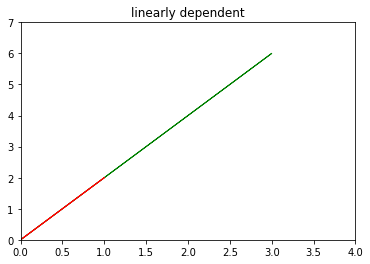

In [178]:
plt.arrow(0, 0, 3, 6, color='green')
plt.arrow(0, 0, 1, 2, color='red')
plt.xlim(0, 4)
plt.ylim(0, 7)
plt.title('linearly dependent')
plt.show()

<function matplotlib.pyplot.show>

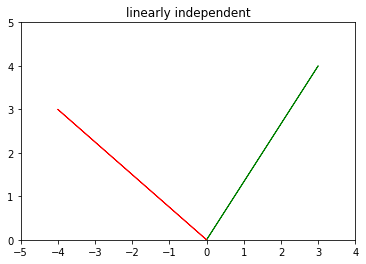

In [179]:
plt.arrow(0, 0, 3, 4, color='green')
plt.arrow(0, 0, -4, 3, color='red')
plt.xlim(-5, 4)
plt.ylim(0, 5)
plt.title('linearly independent')
plt.show

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# it is all vectors that lie on the line y=2x

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# all vectors

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



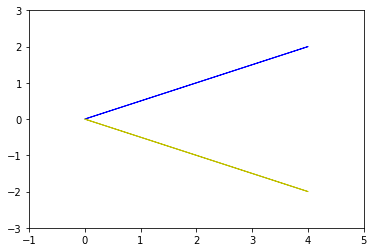

In [180]:
plt.arrow(0, 0, 4, 2, color='b')
plt.arrow(0, 0, 4, -2, color='y')
plt.xlim(-1, 5)
plt.ylim(-3, 3)
plt.show()

## 6.2 What does it mean to form a basis?

that any combination of the two vectors scaled or not, will make any vector within the basis

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
p = np.array([[1, 2, 3],
              [-1, 0, 7],
              [4, 8, 2]])

In [183]:
np.linalg.matrix_rank(p)

3

## 7.2 What does the rank of a matrix tell us?

In [0]:
# How many pivot values there are, which is found by finding the
# Ro-echelon form of the matrix, and counting the number of non-zero nbumber on the 
# main diagonal

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

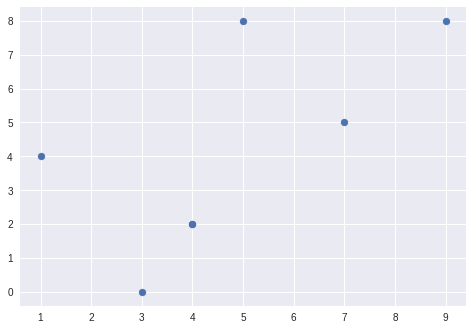

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()